<a href="https://colab.research.google.com/github/YooTaeJeong/AI_SystemDesign/blob/main/AI_System_Design_Final_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 데이터 로드


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
print(iris.DESCR)


In [91]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


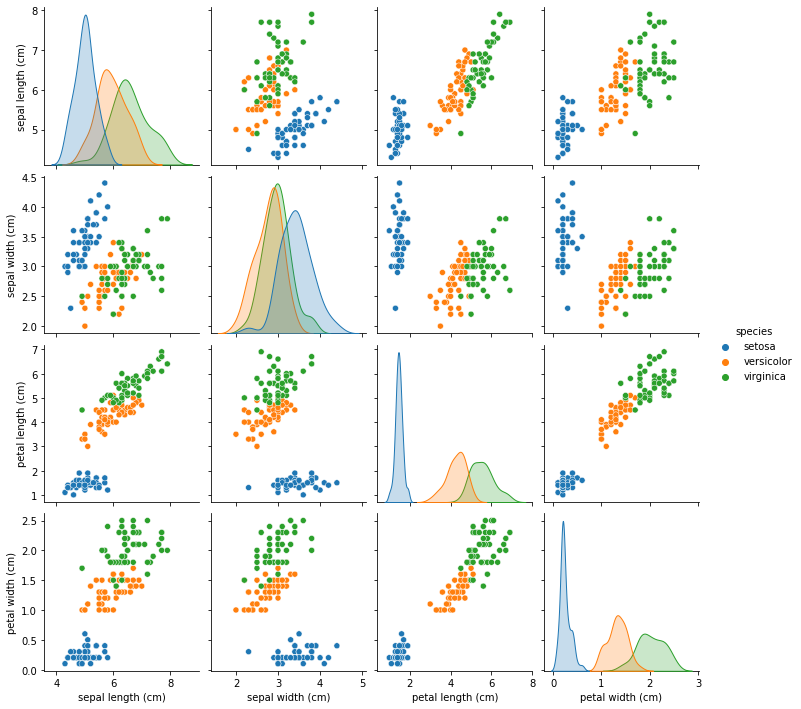

In [92]:
# 데이터를 그래프로 표현
sns.pairplot(df, hue="species")
plt.show()

# 데이터 분석


In [1]:
import numpy as np 
import pandas as pd #  데이터 천처리
import seaborn as sns # 시각화로 표현할 seaborn import
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
# 판다스를 통해 붓꽃 데이터를 읽어온다.
data = pd.read_csv("Iris.csv")

In [6]:
# 읽어온 붓꽃 데이터중 랜덤으로 5개를 보여준다. 데이터를 잘 가져왔는지 확인
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
69,70,5.6,2.5,3.9,1.1,Iris-versicolor


In [4]:
# 읽어온 붓꽃 데이터를 위에서부터 5개 보여준다.
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


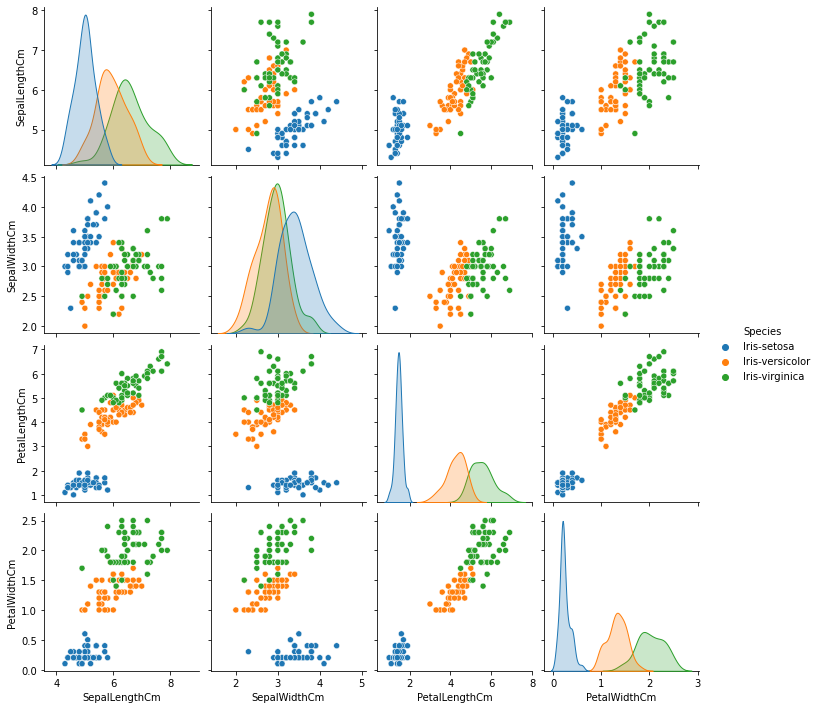

In [9]:
# PetalWidth, PetalLength, SepalWidth, SepalLength 크기를 꺾은선 그래프로 시각화
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [10]:
# 데이터를 표로 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
# data = 판다스 붓꽃 데이터
# df_norm = 붓꽃 데이터에서 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'를 정규화 시킨 데이터
# def calc(x):
#   return (x -행최소값) / (행최대값 - 행최소값)

df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [24]:
# 붓꽃 종류를 숫자로 변환 (인덱싱)
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(5)

,Species
65,1
19,0
131,2
66,1
102,2


In [25]:
# 정규화 데이터와 인덱싱 데이터 합침
df = pd.concat([df_norm, target], axis=1)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


# 훈련, 검증 데이터셋 분리

In [30]:
# 훈련 데이터셋, 검증 데이터셋 분리
train, test = train_test_split(df, test_size = 0.3)

# X(붓꽃 데이터), Y(붓꽃 종류) 값 설정
trainX = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
trainY=train.Species

testX= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
testY =test.Species

In [31]:
print(trainX.head(5))
print(trainY.head(5))
print(testX.head(5))
print(testY.head(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
65        0.666667      0.458333       0.576271      0.541667
88        0.361111      0.416667       0.525424      0.500000
128       0.583333      0.333333       0.779661      0.833333
87        0.555556      0.125000       0.576271      0.500000
31        0.305556      0.583333       0.084746      0.125000
65     1
88     1
128    2
87     1
31     0
Name: Species, dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
108       0.666667      0.208333       0.813559      0.708333
59        0.250000      0.291667       0.491525      0.541667
106       0.166667      0.208333       0.593220      0.666667
118       0.944444      0.250000       1.000000      0.916667
120       0.722222      0.500000       0.796610      0.916667
108    2
59     1
106    2
118    2
120    2
Name: Species, dtype: int64


# MLP
https://www.kaggle.com/avk256/iris-with-mlpclassifier

In [54]:
# 가중치
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# hidden_layer_sizes = 
# activation
# alpha
# batch_size
# learning_rate
# learning_rate_init
# power_t
# max_iter
# shuffle
# random_state
# tol
# verbose = ?
# warm_start
# momentum
# nesterovs_momentum
# early_stopping
# validation_fraction
# beta_1
# beta_2
# epsilon
# n_iter_no_change
# max_fun

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 500), random_state=1, verbose=True)

In [55]:
# 사이킷런 fit?
clf.fit(trainX, trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 500), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [51]:
# 사이킷런 predict?
prediction = clf.predict(testX)
print(prediction)

[2 1 1 2 2 0 1 0 1 0 2 0 1 2 2 2 1 2 1 2 2 1 1 1 2 1 1 2 2 2 2 1 1 0 1 1 0
 1 0 0 1 0 1 1 0]


In [52]:
print(testY.values)

[2 1 2 2 2 0 1 0 1 0 2 0 1 2 2 2 1 2 1 2 2 1 1 1 2 1 1 2 2 2 1 1 1 0 2 1 0
 2 0 0 1 0 1 1 0]


In [53]:
# 사이킷런 accuracy_score
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.9111111111111111


# SVM
https://www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset

In [56]:
from sklearn.svm import SVC

# 아까처럼 파라미터 나열하고 역할 적기
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model=SVC()

In [59]:
model.fit(trainX, trainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
pred=model.predict(testX)

In [61]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(confusion_matrix(testY,pred))

[[10  0  0]
 [ 0 17  1]
 [ 0  2 15]]


In [63]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.94      0.92        18
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



# K-NN 최근접이웃
https://www.kaggle.com/kamrankausar/iris-dataset-ml-and-deep-learning-from-scratch

In [71]:
# 데이터세트 가져오기

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [72]:
# 데이터 로드
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [73]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [75]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [78]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 2019)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [90]:
print('accuracy : {:.2f}'.format(knn.score(X_test, y_test)))

accuracy : 1.00
